# SI 618: Data Manipulation and Analysis
## 02 - Introduction to pandas
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
    
Version 2023.09.06.1.CT

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [1]:
MY_UNIQNAME = 'yanlunar'

## NumPy

Let's set up a couple of plain old python lists

In [2]:
names = ['Alphonso','Beata','Cal','Din','Ella']
scores = [3,5,4,4,5]

### <font color="magenta">Q1: Write code to iterate through the two lists to produce the following output:</font>
```
Alphonso has a score of 3.
Beata has a score of 5.
Cal has a score of 4.
Din has a score of 4.
Ella has a score of 5.
```
Do not import any additional packages (yet).

In [3]:
# insert your code here
for i in range(5):
    print(f"{names[i]} has a score of {scores[i]}.")

Alphonso has a score of 3.
Beata has a score of 5.
Cal has a score of 4.
Din has a score of 4.
Ella has a score of 5.


## NumPy

In [4]:
import numpy as np

In [5]:
ar_names = np.array(names)
ar_names

array(['Alphonso', 'Beata', 'Cal', 'Din', 'Ella'], dtype='<U8')

### <font color="magenta">Q2: Create ```ar_scores``` that contains an array of the scores from above:

In [6]:
ar_scores = np.array(scores)

In [7]:
ar_scores

array([3, 5, 4, 4, 5])

Now, let's say we wanted to modify the scores by multiplying each one by 1.25.

### <font color="magenta">Q3: Write some code that would do that using plain old python (i.e. without using pandas, numpy, etc.)</font>

In [8]:
# insert your code here
new_scores = list( )
for i in scores:
    new_scores.append(i*1.25)
new_scores

[3.75, 6.25, 5.0, 5.0, 6.25]

## ufuncs

We can use ufuncs to multiply each score by 1.25:

In [9]:
modified_scores = ar_scores * 1.25
modified_scores

array([3.75, 6.25, 5.  , 5.  , 6.25])

In [10]:
modified_scores

array([3.75, 6.25, 5.  , 5.  , 6.25])

### <font color="magenta">Q4: write code to create a new array called sqrt_scores that contains the square roots of each of the original scores</font>

In [11]:
# insert your code here
# %%timeit
sqrt_scores=np.sqrt(ar_scores)
sqrt_scores

array([1.73205081, 2.23606798, 2.        , 2.        , 2.23606798])

In [12]:
%%timeit
ar_scores**0.5

1.36 µs ± 81 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## pd.Series

In [13]:
import pandas as pd

In [14]:
s_names = pd.Series(names)

In [15]:
s_names

0    Alphonso
1       Beata
2         Cal
3         Din
4        Ella
dtype: object

In [16]:
s_scores = pd.Series(scores)
s_scores

0    3
1    5
2    4
3    4
4    5
dtype: int64

In [17]:
names # just to remind ourselves what names looks like

['Alphonso', 'Beata', 'Cal', 'Din', 'Ella']

In [18]:
s_scores = pd.Series(scores,index=names)
s_scores

Alphonso    3
Beata       5
Cal         4
Din         4
Ella        5
dtype: int64

## pd.DataFrame

In [19]:
df = pd.DataFrame({"name": names, "score": scores})

In [20]:
df

,name,score
0,Alphonso,3
1,Beata,5
2,Cal,4
3,Din,4
4,Ella,5


In [21]:
specializations = ['DS', 'UX', 'UX', 'DS', 'DS']

In [22]:
df['specialization'] = specializations
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


Let's say we wanted to set the "name" column to be the index:

In [23]:
df.set_index("name")

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [24]:
df_indexed_by_name = df.set_index("name")

In [25]:
df_indexed_by_name

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [26]:
df.set_index("name",inplace = True) # equivalent to df = df.set_index("name")

In [27]:
df

,score,specialization
name,,
Alphonso,3,DS
Beata,5,UX
Cal,4,UX
Din,4,DS
Ella,5,DS


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,5.0,4.2,0.83666,3.0,4.0,4.0,5.0,5.0


In [29]:
df.reset_index(inplace = True)
df

,name,score,specialization
0,Alphonso,3,DS
1,Beata,5,UX
2,Cal,4,UX
3,Din,4,DS
4,Ella,5,DS


# Part 1 (as a group): Mental Health Disorders In the Tech Workplace
From https://www.kaggle.com/osmi/mental-health-in-tech-survey

## Data Description

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

## Metadata
|Field|Description|
|:----|:----|
|**Timestamp**|
|**Age**| 
|**Gender**
|**Country**
|**state**| If you live in the United States, which state or territory do you live in?
|**self_employed**| Are you self-employed?
|**family_history**| Do you have a family history of mental illness?
|**treatment**| Have you sought treatment for a mental health condition?
|**work_interfere**| If you have a mental health condition, do you feel that it interferes with your work?
|**no_employees**| How many employees does your company or organization have?
|**remote_work**| Do you work remotely (outside of an office) at least 50% of the time?
|**tech_company**| Is your employer primarily a tech company/organization?
|**benefits**| Does your employer provide mental health benefits?
|**care_options**| Do you know the options for mental health care your employer provides?
|**wellness_program**| Has your employer ever discussed mental health as part of an employee wellness program?
|**seek_help**| Does your employer provide resources to learn more about mental health issues and how to seek help?
|**anonymity**| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
|**leave**| How easy is it for you to take medical leave for a mental health condition?
|**mental_health_consequence**| Do you think that discussing a mental health issue with your employer would have negative consequences?
|**phys_health_consequence**| Do you think that discussing a physical health issue with your employer would have negative consequences?
|**coworkers**| Would you be willing to discuss a mental health issue with your coworkers?
|**supervisor**| Would you be willing to discuss a mental health issue with your direct supervisor(s)?
|**mental_health_interview**| Would you bring up a mental health issue with a potential employer in an interview?
|**phys_health_interview**| Would you bring up a physical health issue with a potential employer in an interview?
|**mental_vs_physical**| Do you feel that your employer takes mental health as seriously as physical health?
|**obs_consequence**| Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
|**comments**| Any additional notes or comments



Let's load the usual libraries and also ask for plots to be rendered inside the notebook:

In [30]:
import numpy as np
import pandas as pd

Then read the CSV file into a DataFrame:

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/survey.csv")

It's common to look at the resulting DataFrame using .head()

In [32]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


If you want to look at a random sample, you can use .sample()

In [33]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
383,2014-08-27 15:23:33,25,Male,Germany,NaN,No,Yes,Yes,Often,26-100,...,Somewhat easy,No,No,Yes,Yes,No,Yes,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1115,2014-08-30 13:55:45,24,Male,Canada,NaN,No,No,No,Sometimes,26-100,...,Don't know,Maybe,No,No,No,No,Maybe,Don't know,Yes,NaN
801,2014-08-28 13:39:40,23,Male,United States,CA,No,Yes,Yes,Sometimes,6-25,...,Very easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
813,2014-08-28 14:12:58,28,Male,United States,NV,No,No,Yes,Never,6-25,...,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN


Finally, you can get some basic information about the size and shape of the DataFrame:

In [34]:
print("The number of rows of the dataset is: ", len(df))
print("The number of columns of the dataset is: ", len(df.columns))
print("The shape of the dataset is: ", df.shape)

The number of rows of the dataset is:  1259
The number of columns of the dataset is:  27
The shape of the dataset is:  (1259, 27)


You can list the columns:


In [35]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

And you can extract one or more columns.  The following pair of 
commands do exactly the same thing:

In [36]:
print(df['Country'])

0        United States
1        United States
2               Canada
3       United Kingdom
4        United States
             ...      
1254    United Kingdom
1255     United States
1256     United States
1257     United States
1258     United States
Name: Country, Length: 1259, dtype: object


In [37]:
country_state = df[['Country', 'state']]
country_state.head()

,Country,state
0,United States,IL
1,United States,IN
2,Canada,NaN
3,United Kingdom,NaN
4,United States,TX


## Extracting rows

In [38]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [39]:
df.loc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

In [40]:
df.head(1)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN


In [41]:
df_gender = df.set_index('Gender')

In [42]:
df_gender.head()

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Gender,,,,,,,,,,,,,,,,,,,,,
Female,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
M,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
Male,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
Male,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
Male,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [43]:
# df_gender.loc[219] #  will throw an exception
# df_gender.iloc[219]

In [44]:
# df.iloc['Gender'] # will throw an exception

In [45]:
import traceback
try:
    df.iloc['Gender'] # generates error
except TypeError as e:
    print(traceback.format_exc())

Traceback (most recent call last):
  File "/var/folders/v2/8xbh4n71287gwfzxz784538c0000gn/T/ipykernel_41803/2787970466.py", line 3, in <module>
    df.iloc['Gender'] # generates error
    ~~~~~~~^^^^^^^^^^
  File "/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/pandas/core/indexing.py", line 1103, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/luyan/Documents/UM/23Fall/si618/.venv/lib/python3.11/site-packages/pandas/core/indexing.py", line 1653, in _getitem_axis
    raise TypeError("Cannot index by location index with a non-integer key")
TypeError: Cannot index by location index with a non-integer key



In [46]:
df.iloc[0]

Timestamp                    2014-08-27 11:29:31
Age                                           37
Gender                                    Female
Country                            United States
state                                         IL
self_employed                                NaN
family_history                                No
treatment                                    Yes
work_interfere                             Often
no_employees                                6-25
remote_work                                   No
tech_company                                 Yes
benefits                                     Yes
care_options                            Not sure
wellness_program                              No
seek_help                                    Yes
anonymity                                    Yes
leave                              Somewhat easy
mental_health_consequence                     No
phys_health_consequence                       No
coworkers           

## Sorting
You can use either sort_values() or sort_index():


In [47]:
df_sorted = df.sort_values('Age')
df_sorted.tail(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
466,2014-08-27 16:06:46,57,M,United States,CA,No,Yes,Yes,Rarely,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
471,2014-08-27 16:13:40,58,Male,United States,CA,No,No,Yes,Rarely,More than 1000,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,No,NaN
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
952,2014-08-29 01:20:32,61,male,South Africa,NaN,Yes,No,Yes,Sometimes,1-5,...,Very difficult,Yes,Maybe,Some of them,Yes,No,Maybe,No,Yes,NaN
520,2014-08-27 17:12:01,62,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


## Filtering using Boolean Masking

In [48]:
df.Age

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

In [49]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [50]:
df[df['Age'] > 0]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [51]:
df['Age'] > 40

0       False
1        True
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257     True
1258    False
Name: Age, Length: 1259, dtype: bool

In [52]:
df[df['Age'] > 40]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
22,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2015-02-21 11:48:52,41,female,Netherlands,NaN,Yes,No,Yes,Rarely,1-5,...,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Yes,No,The data will be skewed for self-employed peop...
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1243,2015-05-05 14:22:18,43,f,United States,FL,No,Yes,Yes,Rarely,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1248,2015-06-25 12:24:31,41,Female,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,No,No,No,No,Don't know,No,NaN


### Example: Find people who reported a family history of mental health conditions. </font>

Solution:

In [53]:
df[df.family_history == 'Yes']

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


You can use a simple expression like ```df[df['family_history'] == 'Yes']``` or you can make more complex boolean expressions using parentheses: 


In [54]:
df_filtered = df[(df['family_history'] != 'No') & (df['treatment'] == 'Yes')]
df_filtered.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
12,2014-08-27 11:33:23,42,female,United States,CA,NaN,Yes,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,Yes,Yes,Yes,Maybe,Maybe,No,Yes,NaN
15,2014-08-27 11:34:00,29,female,United States,IL,NaN,Yes,Yes,Rarely,26-100,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Maybe,Don't know,No,I have chronic low-level neurological issues t...


In [55]:
df.coworkers.value_counts()

coworkers
Some of them    774
No              260
Yes             225
Name: count, dtype: int64

### <font color="magenta">Q5: How many people are willing to discuss a mental health issue with their supervisor or their coworkers? </font>

In [56]:
df['supervisor'].value_counts()

supervisor
Yes             516
No              393
Some of them    350
Name: count, dtype: int64

In [57]:
# insert your code here
df[(df['supervisor'] == 'Yes') | (df['coworkers'] == 'Yes')]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2015-05-06 10:14:50,22,Male,Australia,NaN,No,Yes,Yes,Often,100-500,...,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes,In australia all organisations of a certain si...
1249,2015-07-22 18:57:54,30,M,United States,CA,No,Yes,Yes,Sometimes,26-100,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,NaN,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN


### <font color="magenta">Q6: Make a new DataFrame ```df_millenials``` with only millennials (born between 1976 and 1996). Make appropriate assumptions when constructing your filter. </font>

In [58]:
df[(df.Timestamp.str[:4].astype(int) - df.Age >= 1976)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


In [59]:
df_millenials = df[df['Age'] >= 25]

**NOTE: We will still use df for the following analysis**

## Descriptive and Summary Statistics

Example: What is the mean age of the survey sample?

Solution:

In [60]:
df['Age'].mean()

79428148.31135821

### Does that look right?  What should we do?

In [61]:
df.sort_values('Age').tail(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
466,2014-08-27 16:06:46,57,M,United States,CA,No,Yes,Yes,Rarely,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
471,2014-08-27 16:13:40,58,Male,United States,CA,No,No,Yes,Rarely,More than 1000,...,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Yes,No,NaN
1236,2015-02-24 10:32:32,60,Male,United States,CA,No,No,Yes,Often,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
952,2014-08-29 01:20:32,61,male,South Africa,NaN,Yes,No,Yes,Sometimes,1-5,...,Very difficult,Yes,Maybe,Some of them,Yes,No,Maybe,No,Yes,NaN
520,2014-08-27 17:12:01,62,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN


### <font color="magenta">Q7: What is the _median_ age of the survey sample?  </font>

In [62]:
# insert your code here
df['Age'].median()

31.0

### <font color="magenta">Q8: Write one line of code to compute basic statistics (mean, standard deviation, min, 25% percentile, etc) about Age  </font>

Hint: see the readings

In [63]:
# insert your code here
df['Age'].describe()
# df['Age'].std()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

## Unique Values, Counts, Membership

Example: Write one line of code to check unique values of Gender</font>

Solution:

In [93]:
df.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [66]:
df.Gender.value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

Example: Write one line of code to count the occurrences of the countries and show the top 5 countries.  </font>

Solution:

In [67]:
df.Country.value_counts().head(7)

Country
United States     751
United Kingdom    185
Canada             72
Germany            45
Ireland            27
Netherlands        27
Australia          21
Name: count, dtype: int64

Are you sure that's correct?

### <font color="magenta">Q9: Find the unique categories of no_employees. What is the frequency of each category? </font>

In [68]:
# insert your code here
df.no_employees.value_counts()

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

### <font color="magenta">Q10: Among the people from United States, how many repondents were there from each state?  </font>

In [69]:
# insert your code here
df.state.value_counts().sort_index()

state
AL      8
AZ      7
CA    138
CO      9
CT      4
DC      4
FL     15
GA     12
IA      4
ID      1
IL     29
IN     27
KS      3
KY      5
LA      1
MA     20
MD      8
ME      1
MI     22
MN     21
MO     12
MS      1
NC     14
NE      2
NH      3
NJ      6
NM      2
NV      3
NY     57
OH     30
OK      6
OR     29
PA     29
RI      1
SC      5
SD      3
TN     45
TX     44
UT     11
VA     14
VT      3
WA     70
WI     12
WV      1
WY      2
Name: count, dtype: int64

## Basic Plots

Example: Investigate the proportion (%) of people receiving health benefits from their employers.

Solution:

In [70]:
df.benefits

0              Yes
1       Don't know
2               No
3               No
4              Yes
           ...    
1254            No
1255           Yes
1256           Yes
1257            No
1258           Yes
Name: benefits, Length: 1259, dtype: object

In [71]:
df.benefits.value_counts(normalize=True)

benefits
Yes           0.378872
Don't know    0.324067
No            0.297061
Name: proportion, dtype: float64

<Axes: xlabel='benefits'>

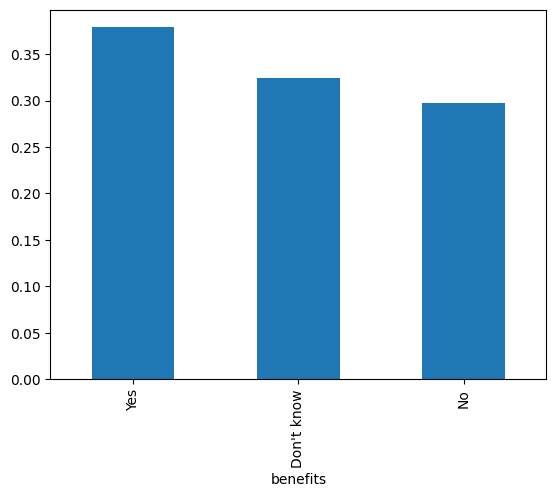

In [72]:
df.benefits.value_counts(normalize=True).plot.bar()

Example: Create a histogram of the distribution of Age values:

<Axes: ylabel='Frequency'>

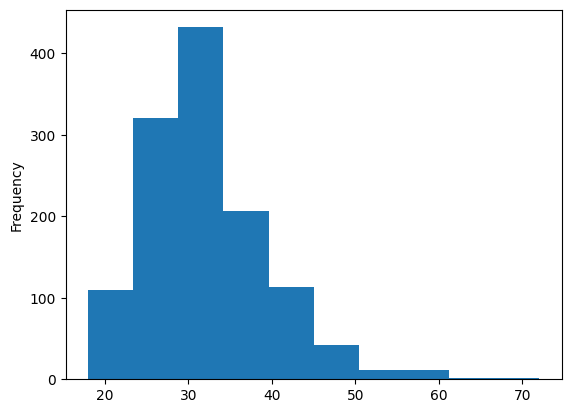

In [73]:
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist()

### <font color="magenta">Q11: Experiment with the number of bins in the histogram of the Age distribution.  Is there a "best" value?</font>

Hint: use the bins= option to plot()

<Axes: ylabel='Frequency'>

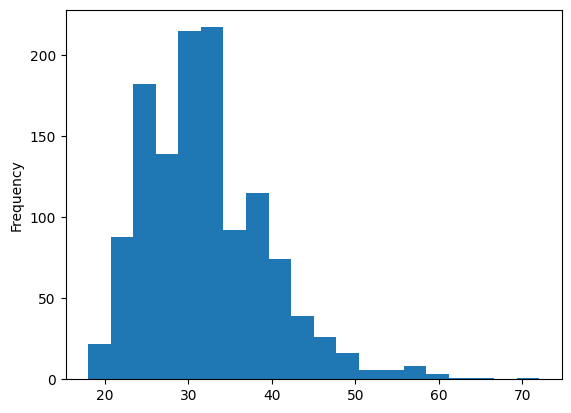

In [74]:
# insert your code here
df[(df.Age < 100) & (df.Age > 15)].Age.plot.hist(bins=20)

## Aggregation

Example: Find the number of participants from each state.

Solution:

In [75]:
df.state.value_counts()

state
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64

In [76]:
df.groupby('state').size()

state
AL      8
AZ      7
CA    138
CO      9
CT      4
DC      4
FL     15
GA     12
IA      4
ID      1
IL     29
IN     27
KS      3
KY      5
LA      1
MA     20
MD      8
ME      1
MI     22
MN     21
MO     12
MS      1
NC     14
NE      2
NH      3
NJ      6
NM      2
NV      3
NY     57
OH     30
OK      6
OR     29
PA     29
RI      1
SC      5
SD      3
TN     45
TX     44
UT     11
VA     14
VT      3
WA     70
WI     12
WV      1
WY      2
dtype: int64

### <font color="magenta">Q12: Find the median age of people for each state. </font>

In [77]:
# insert your code here
df.groupby('state')['Age'].median()

state
AL    34.0
AZ    33.0
CA    31.0
CO    31.0
CT    37.5
DC    37.5
FL    34.0
GA    30.0
IA    40.0
ID    55.0
IL    30.0
IN    34.0
KS    39.0
KY    24.0
LA    35.0
MA    32.0
MD    29.0
ME    40.0
MI    34.0
MN    30.0
MO    33.5
MS    33.0
NC    32.0
NE    26.0
NH    34.0
NJ    32.0
NM    29.5
NV    28.0
NY    29.0
OH    31.0
OK    26.5
OR    32.0
PA    31.0
RI    23.0
SC    30.0
SD    34.0
TN    33.0
TX    31.5
UT    28.0
VA    40.5
VT    34.0
WA    32.5
WI    33.0
WV    23.0
WY    41.5
Name: Age, dtype: float64

# Part 2 (on your own): Exploration of Movie Titles and Movie Cast

## Time to load some data:

In [78]:
titles = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/titles.csv', index_col=None)

In [79]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


The titles DataFrame contains a list of movie titles and release year

In [80]:
cast = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/cast.zip', index_col=None)

The ```cast``` DataFrame contains the following columns 

**title** = name of movie

**year** = year of movie

**name** = name of actor/actress

**type** = actor or actress

**character** = character name

**n** = number in the credits (NaN when not available)

In [81]:
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [82]:
cast.sample(5)

,title,year,name,type,character,n
2273038,Bebek,1987,Erdo Vatan,actor,Ziya,NaN
2329985,Lost & Found (IV),2016,Jesse (II) Warren,actor,David,NaN
1320522,Septien,2011,Robert Longstreet,actor,Ezra Rawlings,2.0
571822,Kumeyaay Land,2015,Fausto Diaz Ojeda,actor,G?ero,NaN
3057927,Alone with a Stranger,2001,Alexandra Lee,actress,Lindsey Kennington,13.0


### <font color="magenta">Q13: How many entries are there in the titles table?</font>

In [83]:
# insert your code here
len(titles)

232330

### <font color="magenta">Q14: What are the two earliest movies?</font>

In [84]:
# insert your code here
titles.sort_values("year").head(2)

,title,year
177757,Miss Jerry,1894
215272,The Startled Lover,1898


### <font color="magenta">Q15: How many movies have the title "Hamlet"?</font>

In [85]:
# insert your code here
titles[titles['title'] == 'Hamlet']

,title,year
6009,Hamlet,1948
45350,Hamlet,1990
46721,Hamlet,1910
92146,Hamlet,1976
94355,Hamlet,1987
94554,Hamlet,2000
98554,Hamlet,1921
102919,Hamlet,2011
122704,Hamlet,1969
128388,Hamlet,1954


### <font color="magenta">Q16: List all of the "Treasure Island" movies from earliest to most recent.</font>

In [86]:
# insert your code here
titles[titles['title'] == 'Treasure Island'].sort_values('year')

,title,year
206027,Treasure Island,1918
51287,Treasure Island,1920
191050,Treasure Island,1934
96934,Treasure Island,1950
89534,Treasure Island,1972
111343,Treasure Island,1973
205397,Treasure Island,1985
179354,Treasure Island,1999


### <font color="magenta">Q17: What are the ten most common movie names of all time?</font>

In [87]:
titles.title.value_counts().head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Temptation              11
Othello                 11
The Three Musketeers    11
Freedom                 11
Kismet                  11
Name: count, dtype: int64

In [88]:
# insert your code here
titles.groupby('title').size().sort_values(ascending=False).head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Kismet                  11
The Three Musketeers    11
Freedom                 11
Temptation              11
Othello                 11
dtype: int64

### Stretch goals
The following questions are extra material and need not be completed as part of this
notebook.  We will, however, start next class by considering this material, so it's 
worth attempting if you have time.

### EXTRA: <font color="magenta">Who are the 10 people most often credited as "Herself" in film history?</font>

In [89]:
# insert code here
cast[cast['type'] == 'actress'].groupby('name').size().sort_values(ascending=False).head(10)

name
Bess Flowers       819
Aruna Irani        290
Mary Gordon        282
Helen              259
Gertrude Astor     235
Leonor G?mez       227
Minerva Urecal     227
Sukumari           208
Dorothy Vernon     207
Suzanne Ridgway    205
dtype: int64

In [90]:
cast[cast['type'] == 'actress'].name.value_counts()

name
Bess Flowers               819
Aruna Irani                290
Mary Gordon                282
Helen                      259
Gertrude Astor             235
                          ... 
Paulette Kniseley            1
Laura Knirsch                1
Knirke                       1
May Cathala Knipschildt      1
Rosa ? R?gvu                 1
Name: count, Length: 492421, dtype: int64

### EXTRA: <font color="magenta">What are the 10 most frequent roles that start with the word "Science"?</font>
Hint: read docs on str.startswith()

In [91]:
# insert code here
cast_test=cast.dropna(subset=['character'], how='any')
cast_test[cast_test['character'].str.startswith("Science")].groupby('character').size().sort_values(ascending=False).head(10)

character
Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Reporter         5
Science Promo Cadet      5
Science Club Member      5
Science Kid              5
Science                  4
Science Officer          3
dtype: int64

### EXTRA: <font color="magenta">Comment on the differences in gender ratios for leading vs. supporting roles in the 1950s.  Does there appear to be a bias?</font>

Insert your response here.